In [20]:
import numpy as np 
import pandas as pd 
import math as math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
dfG1 = pd.read_csv('../SolarGeneration/Plant_1_Generation_Data.csv')
dfG2 = pd.read_csv('../SolarGeneration/Plant_2_Generation_Data.csv')
dfW1 = pd.read_csv('../SolarGeneration/Plant_1_Weather_Sensor_Data.csv')
dfW2 = pd.read_csv('../SolarGeneration/Plant_2_Weather_Sensor_Data.csv')

In [3]:
#cleaning data
dfG1['DATE_TIME'] = pd.to_datetime(dfG1['DATE_TIME'], errors='coerce')
dfG2['DATE_TIME'] = pd.to_datetime(dfG2['DATE_TIME'], errors='coerce')
dfW1['DATE_TIME'] = pd.to_datetime(dfW1['DATE_TIME'], errors='coerce')
dfW2['DATE_TIME'] = pd.to_datetime(dfW2['DATE_TIME'], errors='coerce')

dfG1['TIME'] = dfG1['DATE_TIME'].dt.time
dfG2['TIME'] = dfG2['DATE_TIME'].dt.time
dfW1['TIME'] = dfW1['DATE_TIME'].dt.time
dfW2['TIME'] = dfW2['DATE_TIME'].dt.time

dfG1['DATE'] = pd.to_datetime(dfG1['DATE_TIME'].dt.date)
dfG2['DATE'] = pd.to_datetime(dfG2['DATE_TIME'].dt.date)
dfW1['DATE'] = pd.to_datetime(dfW1['DATE_TIME'].dt.date)
dfW2['DATE'] = pd.to_datetime(dfW2['DATE_TIME'].dt.date)

In [4]:
dfG1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   TIME         68778 non-null  object        
 8   DATE         68778 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


In [5]:
dfG1['DATE'].dt.date.unique()

array([datetime.date(2020, 5, 15), datetime.date(2020, 5, 16),
       datetime.date(2020, 5, 17), datetime.date(2020, 5, 18),
       datetime.date(2020, 5, 19), datetime.date(2020, 5, 20),
       datetime.date(2020, 5, 21), datetime.date(2020, 5, 22),
       datetime.date(2020, 5, 23), datetime.date(2020, 5, 24),
       datetime.date(2020, 5, 25), datetime.date(2020, 5, 26),
       datetime.date(2020, 5, 27), datetime.date(2020, 5, 28),
       datetime.date(2020, 5, 29), datetime.date(2020, 5, 30),
       datetime.date(2020, 5, 31), datetime.date(2020, 1, 6),
       datetime.date(2020, 2, 6), datetime.date(2020, 3, 6),
       datetime.date(2020, 4, 6), datetime.date(2020, 5, 6),
       datetime.date(2020, 6, 6), datetime.date(2020, 7, 6),
       datetime.date(2020, 8, 6), datetime.date(2020, 9, 6),
       datetime.date(2020, 10, 6), datetime.date(2020, 11, 6),
       datetime.date(2020, 12, 6), datetime.date(2020, 6, 13),
       datetime.date(2020, 6, 14), datetime.date(2020, 6, 15),
 

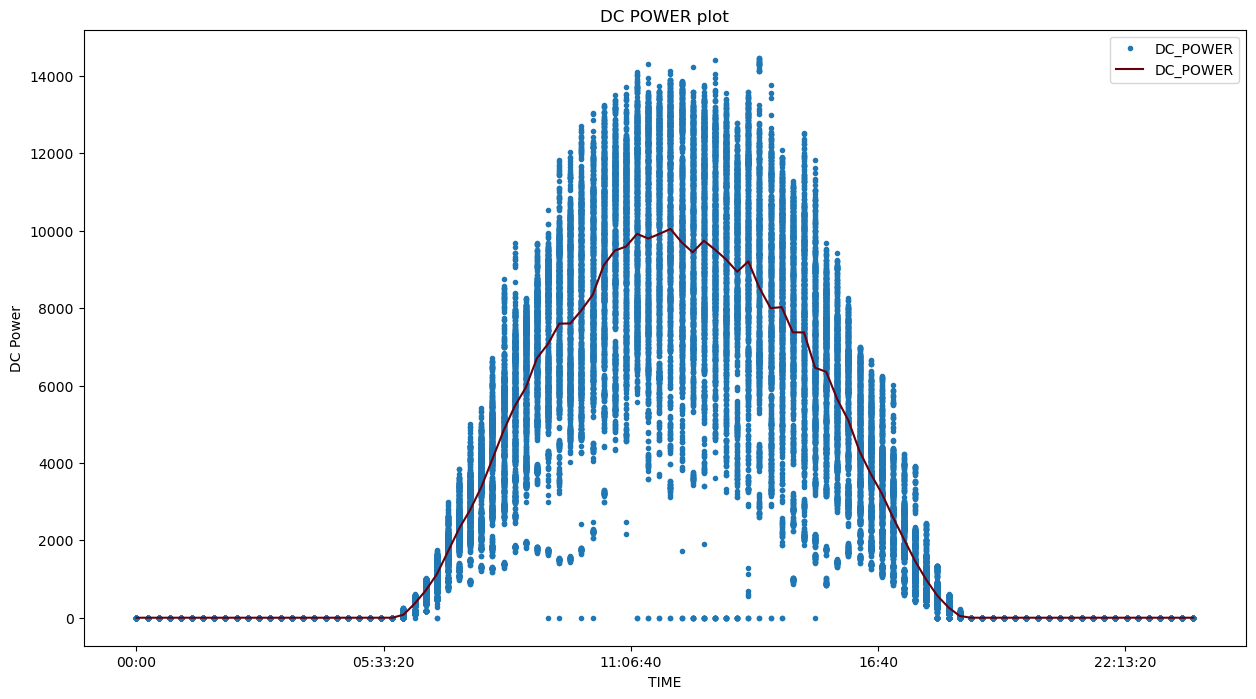

In [8]:
dfG1.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG1.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

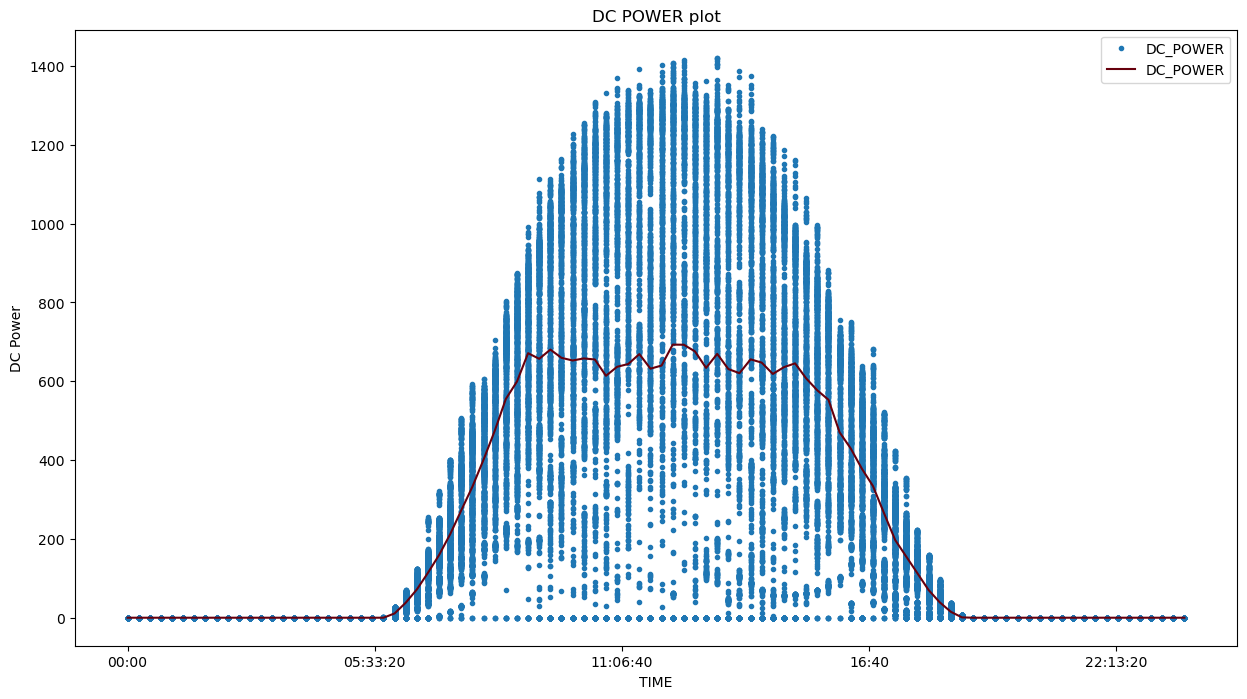

In [10]:
dfG2.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG2.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

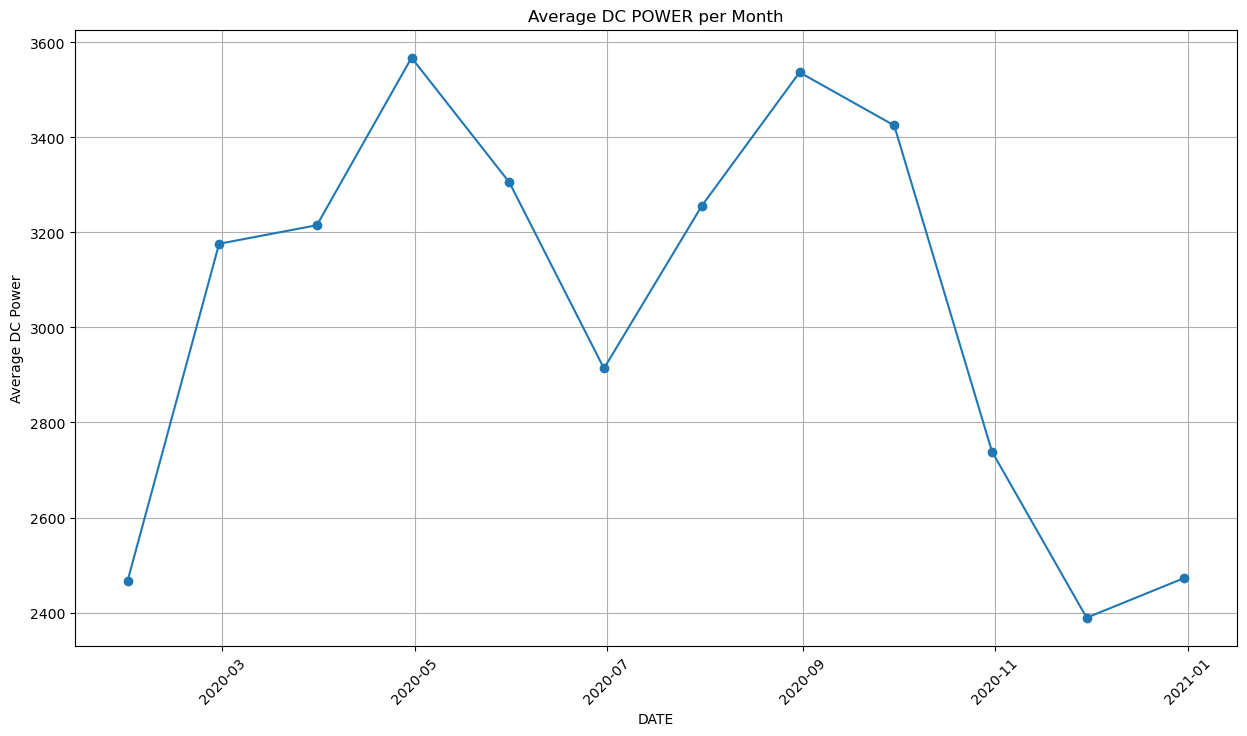

In [40]:
# Calculate the average DC POWER per month
average_dc_power_per_month = dfG1.resample('M', on='DATE')['DC_POWER'].mean()

# Create the 2D plot
plt.figure(figsize=(15, 8))
plt.plot(average_dc_power_per_month.index, average_dc_power_per_month.values, marker='o', linestyle='-')
plt.xlabel('DATE')
plt.ylabel('Average DC Power')
plt.title('Average DC POWER per Month')
plt.grid(True)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [17]:
dfG1['DATE'].max()

Timestamp('2020-12-06 00:00:00')

In [34]:
valores_unicos_ordenados = sorted(dfG1['DATE'].unique())
for valor in valores_unicos_ordenados:
    print(valor)

2020-01-06T00:00:00.000000000
2020-02-06T00:00:00.000000000
2020-03-06T00:00:00.000000000
2020-04-06T00:00:00.000000000
2020-05-06T00:00:00.000000000
2020-05-15T00:00:00.000000000
2020-05-16T00:00:00.000000000
2020-05-17T00:00:00.000000000
2020-05-18T00:00:00.000000000
2020-05-19T00:00:00.000000000
2020-05-20T00:00:00.000000000
2020-05-21T00:00:00.000000000
2020-05-22T00:00:00.000000000
2020-05-23T00:00:00.000000000
2020-05-24T00:00:00.000000000
2020-05-25T00:00:00.000000000
2020-05-26T00:00:00.000000000
2020-05-27T00:00:00.000000000
2020-05-28T00:00:00.000000000
2020-05-29T00:00:00.000000000
2020-05-30T00:00:00.000000000
2020-05-31T00:00:00.000000000
2020-06-06T00:00:00.000000000
2020-06-13T00:00:00.000000000
2020-06-14T00:00:00.000000000
2020-06-15T00:00:00.000000000
2020-06-16T00:00:00.000000000
2020-06-17T00:00:00.000000000
2020-07-06T00:00:00.000000000
2020-08-06T00:00:00.000000000
2020-09-06T00:00:00.000000000
2020-10-06T00:00:00.000000000
2020-11-06T00:00:00.000000000
2020-12-06

/tmp/ipykernel_10590/1695573334.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TIME_x', 'SOURCE_KEY_x', 'PLANT_ID_x', 'DATE_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_plant1 = pd.merge(dfG1, dfW1, on='DATE_TIME', how='left')


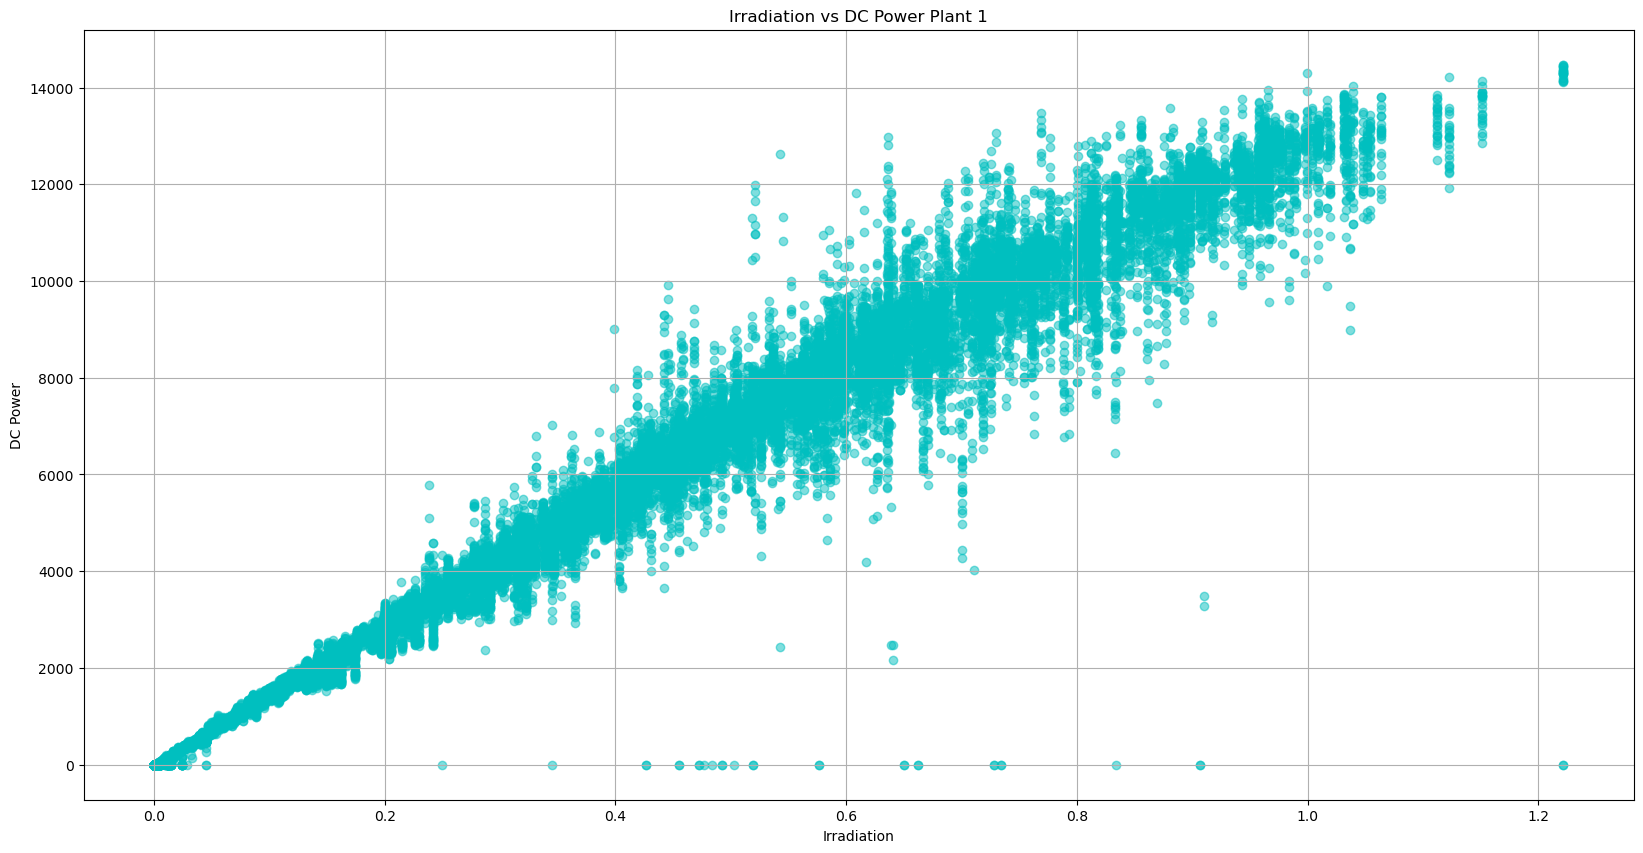

In [43]:
# Irradiation VS DC Power
# Plant 1

df_plant1 = pd.merge(dfG1, dfW1, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 1")
plt.scatter(df_plant1['IRRADIATION'], df_plant1['DC_POWER'], c='c', alpha=0.5)
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.grid()
plt.show()



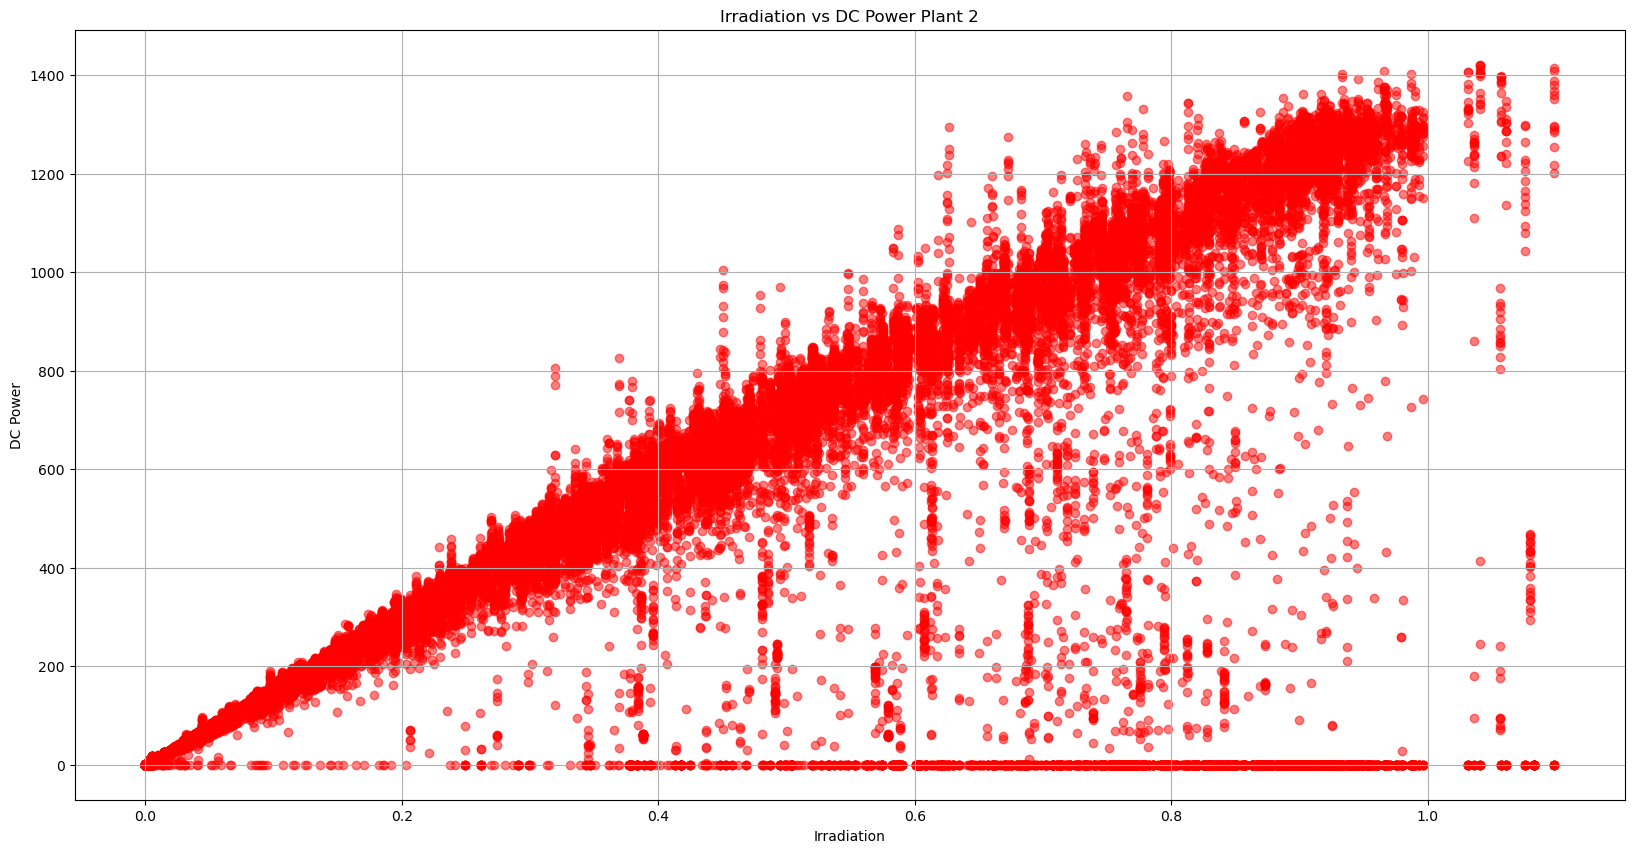

In [45]:
# Irradiation VS DC Power
# Plant 2

df_plant2 = pd.merge(dfG2, dfW2, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 2")
plt.scatter(df_plant2['IRRADIATION'], df_plant2['DC_POWER'], c='red', alpha=0.5)
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.grid()
plt.show()

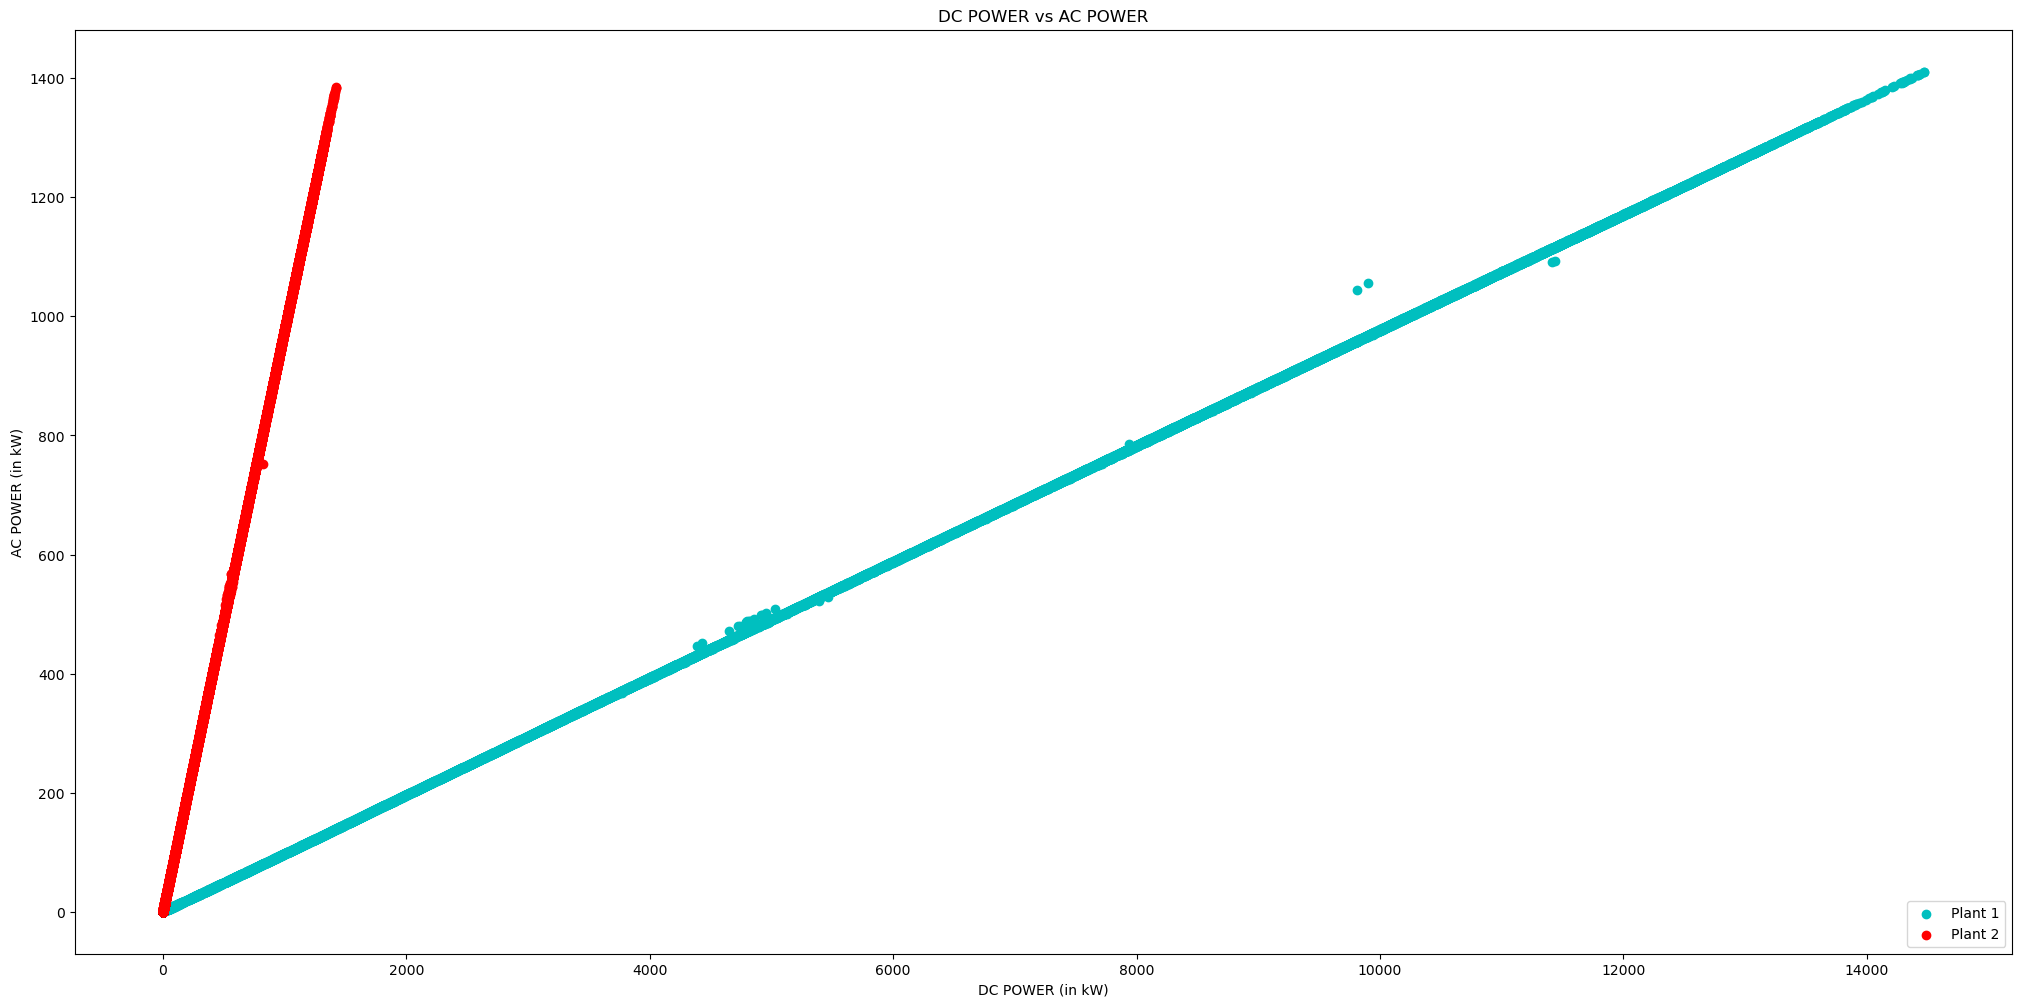

In [53]:
# The linear regression model 
DC_POW1 = dfG1.iloc[:,[3]].values
AC_POW1 = dfG1.iloc[:,[4]].values
DC_POW2 = dfG2.iloc[:,[3]].values
AC_POW2 = dfG2.iloc[:,[4]].values
plt.figure(figsize = (25, 12))
plt.scatter(DC_POW1, AC_POW1, color = 'c', label = 'Plant 1')
plt.scatter(DC_POW2, AC_POW2, color = 'red', label = 'Plant 2')
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (in kW)')
plt.ylabel('AC POWER (in kW)')
plt.title('DC POWER vs AC POWER')
plt.show()

